In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Food and ingredients from Wikidata

In [2]:
df_raw = pd.read_csv("Downloads/query3.csv", index_col=None, header=0)

In [3]:
df = pd.DataFrame()
df['food'] = df_raw['food']
df['food_name'] = df_raw['foodLabel']
df['ingredient_id'] = df_raw['mother']
df['ingredient_name'] = df_raw['label_clean']
df['origin_id'] = df_raw['father']
df['origin_name'] = df_raw['fatherLabel']
df['ingredient_category'] = df_raw['category']
df

food       food_name  \
0     http://www.wikidata.org/entity/Q100255672            moho   
1     http://www.wikidata.org/entity/Q100255672            moho   
2     http://www.wikidata.org/entity/Q100255672            moho   
3     http://www.wikidata.org/entity/Q100255672            moho   
4     http://www.wikidata.org/entity/Q100529246          punten   
...                                         ...             ...   
3157     http://www.wikidata.org/entity/Q903997     yayık ayran   
3158     http://www.wikidata.org/entity/Q909438   tea in Turkey   
3159   http://www.wikidata.org/entity/Q97207900  meyhane pilavı   
3160   http://www.wikidata.org/entity/Q97207900        kıvratma   
3161   http://www.wikidata.org/entity/Q97207900            pişi   

                                ingredient_id ingredient_name  \
0       http://www.wikidata.org/entity/Q11002           sugar   
1      http://www.wikidata.org/entity/Q841779    coconut milk   
2     http://www.wikidata.org/entity/Q1269205      rice flour   
3     http://www.wikidata.org/entity/Q2249305     wheat flour   
4       http://www.wikidata.org/entity/Q11254            salt   
...                                       ...             ...   
3157    http://www.wikidata.org/entity/Q36465           flour   
3158   http://www.wikidata.org/entity/Q178024           dough   
3159  http://www.wikidata.org/entity/Q5995455      Wheat mote   
3160    http://www.wikidata.org/entity/Q13317          yogurt   
3161    http://www.wikidata.org/entity/Q34172          butter   

                                    origin_id origin_name ingredient_category  
0                                         NaN         NaN               spice  
1                                         NaN         NaN              fruits  
2                                         NaN         NaN               flour  
3                                         NaN         NaN               flour  
4                                         NaN         NaN               spice  
...                                       ...         ...                 ...  
3157    http://www.wikidata.org/entity/Q36465       flour               flour  
3158   http://www.wikidata.org/entity/Q178024       dough               dough  
3159  http://www.wikidata.org/entity/Q5995455  Wheat mote          Wheat mote  
3160    http://www.wikidata.org/entity/Q13317      yogurt              yogurt  
3161    http://www.wikidata.org/entity/Q34172      butter              butter  

[3162 rows x 7 columns]

# Creating Database

In [4]:
import sqlite3 as sl


In [5]:
con = sl.connect('test_db.db')


In [6]:
with con:
    con.execute("""
        CREATE TABLE IF NOT EXISTS FOOD_INGREDIENT (
            food TEXT NOT NULL,
            food_name TEXT,
            ingredient_id TEXT,
            ingredient_name TEXT,
            origin_id TEXT,
            origin_name TEXT,
            ingredient_category TEXT
        );
    """)

In [7]:
data = df.values.tolist()
len(data)

3162

In [8]:
sql = 'INSERT INTO FOOD_INGREDIENT (food, food_name, ingredient_id, ingredient_name, origin_id, origin_name, ingredient_category) values(?, ?, ?, ?, ?, ?, ?)'


In [9]:
with con:
    con.executemany(sql, data)

In [10]:
#WHERE food_name = 'cenil'
with con:
    data = con.execute("SELECT * FROM FOOD_INGREDIENT")
    for row in data:
        print(row)
        

('http://www.wikidata.org/entity/Q100255672', 'moho', 'http://www.wikidata.org/entity/Q11002', 'sugar', None, None, 'spice')
('http://www.wikidata.org/entity/Q100255672', 'moho', 'http://www.wikidata.org/entity/Q841779', 'coconut milk', None, None, 'fruits')
('http://www.wikidata.org/entity/Q100255672', 'moho', 'http://www.wikidata.org/entity/Q1269205', 'rice flour', None, None, 'flour')
('http://www.wikidata.org/entity/Q100255672', 'moho', 'http://www.wikidata.org/entity/Q2249305', 'wheat flour', None, None, 'flour')
('http://www.wikidata.org/entity/Q100529246', 'punten', 'http://www.wikidata.org/entity/Q11254', 'salt', None, None, 'spice')
('http://www.wikidata.org/entity/Q100529246', 'punten', 'http://www.wikidata.org/entity/Q115443', 'glutinous rice', None, None, 'carb')
('http://www.wikidata.org/entity/Q100529246', 'punten', 'http://www.wikidata.org/entity/Q841779', 'coconut milk', None, None, 'fruits')
('http://www.wikidata.org/entity/Q101432536', 'Lemonilo', None, None, None, No

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Data Preprocessing

In [11]:
df = pd.read_sql_query("SELECT food_name, group_concat(replace(ingredient_name,' ','_'), ' ') as ingredient_list from (select distinct food_name, ingredient_name from FOOD_INGREDIENT) group by 1", con)
df.shape
df = df.dropna()

In [12]:
total_ingredient = pd.read_sql_query("SELECT ingredient_name, ingredient_category, count(distinct food_name) from FOOD_INGREDIENT where ingredient_name is not null group by 1,2 order by 3 desc", con)
total_ingredient

ingredient_name ingredient_category  count(distinct food_name)
0      coconut milk              fruits                         63
1              salt               spice                         59
2             sugar               spice                         44
3            garlic               spice                         35
4        palm sugar           seasoning                         34
..              ...                 ...                        ...
508    walnut shell        walnut shell                          1
509   white cabbage          vegetables                          1
510            wine                wine                          1
511           yeast               yeast                          1
512            yolk       dairy and egg                          1

[513 rows x 3 columns]

In [13]:
ingredient_in_list = [ingredient.split() for ingredient in df.ingredient_list]


In [14]:
import nltk
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in ingredient_in_list]

# View bigrams for the first tweet
terms_bigram[0]

[]

In [15]:
import itertools
import collections

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('sugar', 'salt'), 22),
 (('coconut_milk', 'rice_flour'), 14),
 (('Central_Java', 'Jepara'), 14),
 (('glutinous_rice', 'coconut_milk'), 7),
 (('rice_flour', 'wheat_flour'), 7),
 (('pandan', 'coconut_milk'), 7),
 (('coconut_milk', 'palm_sugar'), 6),
 (('salt', 'coconut_milk'), 6),
 (('sugar', 'coconut_milk'), 6),
 (('palm_sugar', 'coconut'), 6),
 (('palm_sugar', 'cassava'), 6),
 (('salt', 'chili'), 5),
 (('salt', 'garlic'), 5),
 (('rice_flour', 'coconut'), 5),
 (('water', 'salt'), 5),
 (('sugar', 'glutinous_rice'), 4),
 (('coconut_milk', 'glutinous_rice_flour'), 4),
 (('coconut', 'glutinous_rice_flour'), 4),
 (('Central_Java', 'East_Java'), 4),
 (('onion', 'garlic'), 4)]

In [16]:
from collections import defaultdict

def co_occurrence(sentences, window_size):
    d = defaultdict(int)
    vocab = set()
    for text in sentences:
        # preprocessing
        text = text.lower().split()
        # iterate over ingredient list
        for i in range(len(text)):
            token = text[i]
            vocab.add(token)  # add to vocab
            next_token = text[i+1 : i+1+window_size]
            for t in next_token:
                key = tuple( sorted([t, token]) )
                d[key] += 1
    
    # formulate the dictionary into dataframe
    vocab = sorted(vocab) # sort vocab
    df = pd.DataFrame(data=np.zeros((len(vocab), len(vocab)), dtype=np.int16),
                      index=vocab,
                      columns=vocab)
    for key, value in d.items():
        df.at[key[0], key[1]] = value
        df.at[key[1], key[0]] = value
    return df

In [17]:
df_test = co_occurrence(df.ingredient_list, 2)
df_test.shape

(435, 435)

In [18]:
df_temp = df_test


In [19]:
columns = list(df_temp)
len(columns)

435

In [20]:
df_compiled = pd.DataFrame(columns=['bigram','count'])

for i,row in df_test.iterrows():
    for j in columns:
        if row[j] > 0:
            bigram_name = (i,j)
            reverse_bigram_name = (j,i)
            bigram_value = row[j]
            df_t = pd.DataFrame(columns=['bigram','count'])
            df_t.loc[-1] = [bigram_name, bigram_value]
            if df_compiled[df_compiled['bigram']==reverse_bigram_name].empty == False:
                print('dup')
            else:
                df_compiled = df_compiled.append(df_t, ignore_index = True)

dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup
dup


In [21]:
df_compiled = df_compiled.sort_values(by=['count'], ascending=False)
df_compiled.shape

(1036, 2)

In [22]:
import networkx as nx


In [23]:
d = df_compiled.set_index('bigram').T.to_dict('records')
len(d[0].values())

1036

In [24]:
G = nx.Graph()
c=0
# Create connections between nodes
for k, v in d[0].items():
    c = c+1
    G.add_edge(k[0], k[1], weight=(v * 10))

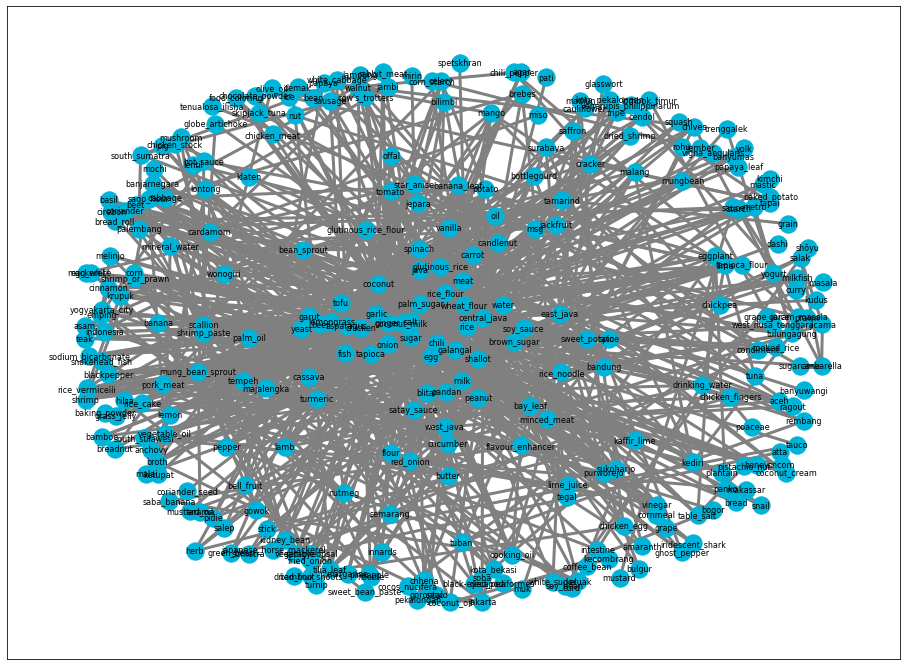

In [25]:
fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=8,
                 width=3,
                 edge_color='grey',
                 node_color='#00b4d9',
                 with_labels = True,
                 ax=ax)

plt.show()


In [26]:
weights = nx.get_edge_attributes(G,'weight').values()
len(weights)

1036

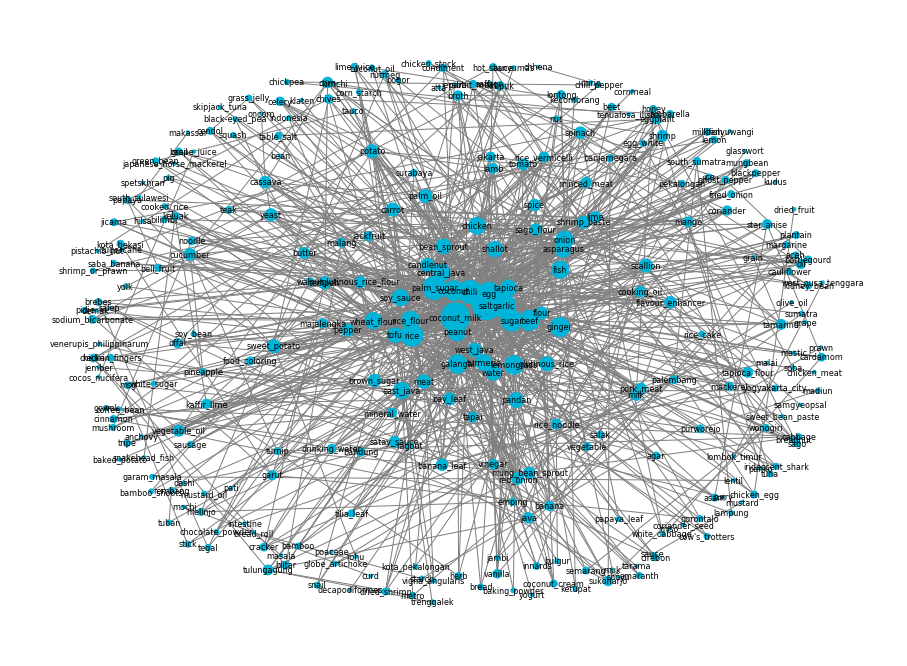

In [27]:
fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=2)

d = dict(G.degree)

nx.draw(G, pos,
        font_size=8,
        width=1,
        edge_color='grey',
        node_color='#00b4d9',
        with_labels = True, 
        nodelist=d.keys(), 
        node_size=[v * 12 for v in d.values()])
plt.show()

In [28]:

carac = pd.DataFrame()
carac = total_ingredient[['ingredient_name','ingredient_category']]
len(d.values())

297

In [29]:
edges = G.number_of_edges()
nodes = G.number_of_nodes()
print(f"Number of nodes: {nodes} & number of edges: {edges}")

Number of nodes: 297 & number of edges: 1036


# community detection

In [30]:
from community import community_louvain
import matplotlib.pyplot as plt

In [31]:
comms = community_louvain.best_partition(G)
print(comms.values())

dict_values([0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 4, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 4, 0, 4, 4, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 4, 4, 0, 5, 2, 0, 0, 0, 1, 4, 4, 1, 0, 4, 4, 4, 0, 2, 1, 1, 0, 4, 1, 1, 4, 1, 1, 4, 4, 1, 2, 2, 0, 4, 2, 2, 2, 0, 4, 4, 2, 1, 4, 1, 1, 1, 1, 2, 2, 2, 7, 7, 0, 2, 1, 4, 1, 4, 2, 2, 2, 2, 8, 8, 2, 2, 2, 2, 2, 2, 5, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 4, 4, 4, 4, 0, 1, 4, 4, 2, 1, 4, 9, 9, 0, 5, 10, 10, 5, 1, 4, 4, 5, 4, 4, 0, 5, 4, 4, 11, 4, 4, 0, 2, 5, 4, 2, 0, 11, 1, 1, 0, 2, 0, 1, 2, 5, 5, 1, 5, 2, 2, 4, 2, 2, 1, 1, 0, 12, 12, 0, 2, 0, 0, 0, 4, 4, 2, 13, 13, 2, 2, 4, 4, 10, 2, 1, 1, 2, 4, 0, 5, 5, 2, 0, 1, 1, 4, 0, 5, 0, 2, 4, 2, 0, 0, 4, 14, 14, 0, 0, 0, 4, 4, 0, 4, 4, 4, 5, 4, 2, 4, 4, 2, 4, 1, 1, 1, 11, 11, 1, 1, 4, 0, 2, 15, 15, 16, 16, 17, 17, 0, 0, 3, 3, 4, 0, 0, 2, 4, 4, 1, 4, 0, 4, 8, 8, 8, 1, 6, 6, 11, 0])


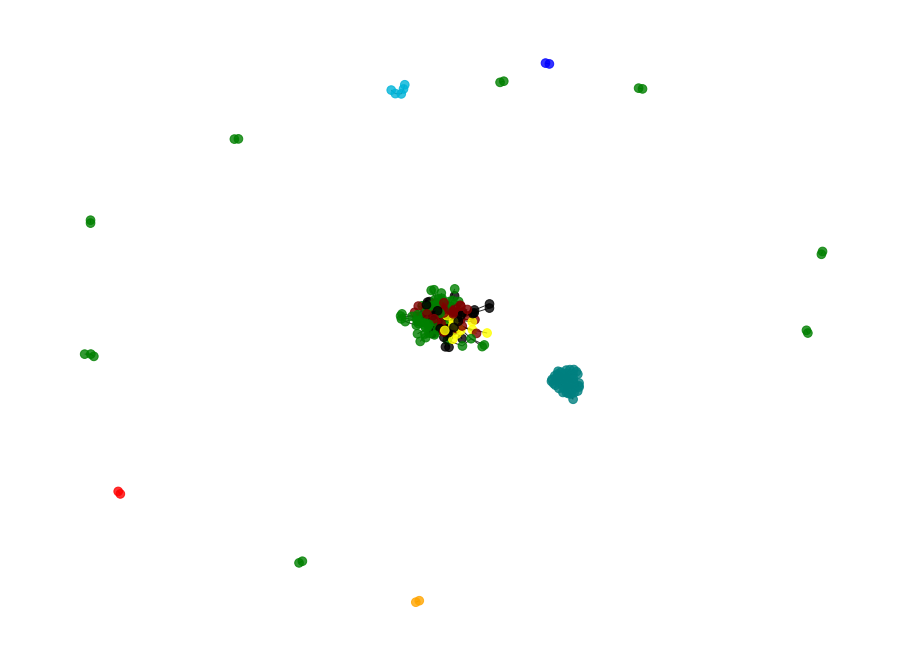

In [32]:
fig, ax = plt.subplots(figsize=(16, 12))
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'red',
    7 : 'blue',
    8 : '#00b4d9',
    9 : 'green',
    10: 'green',
    11: 'green',
    12: 'green',
    13: 'green',
    14: 'green',
    15: 'green',
    16: 'green',
    17: 'green'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()

# Degree Distribution

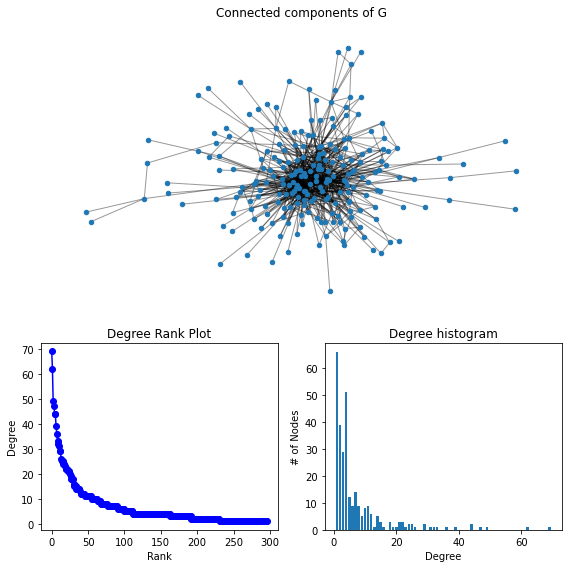

In [34]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [35]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [36]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  297
Number of edges:  1036

Average degree:  6.976430976430977
Average degree (alternate calculation) 6.976430976430977

Minimum degree:  1
Maximum degree:  69


In [37]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [38]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [39]:
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

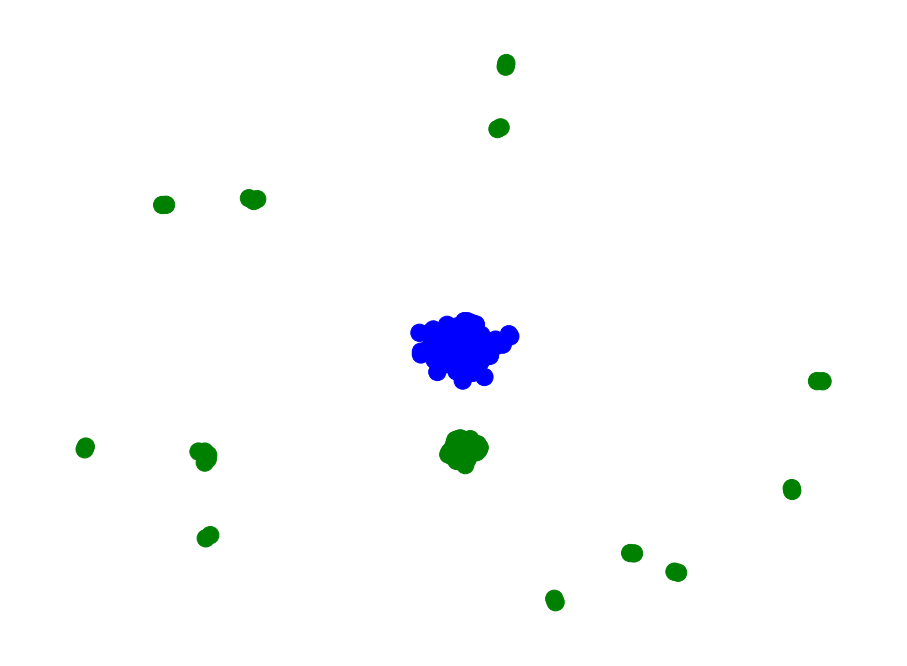

In [40]:
fig, ax = plt.subplots(figsize=(16, 12))
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

# Centrality 

In [41]:
deg_centrality = nx.degree_centrality(G)

In [42]:
deg_centrality

{'salt': 0.20945945945945948,
 'sugar': 0.12162162162162163,
 'coconut_milk': 0.23310810810810811,
 'rice_flour': 0.08783783783783784,
 'central_java': 0.08108108108108109,
 'jepara': 0.0033783783783783786,
 'glutinous_rice': 0.05405405405405406,
 'wheat_flour': 0.07432432432432433,
 'palm_sugar': 0.14864864864864866,
 'garlic': 0.16554054054054054,
 'onion': 0.08445945945945946,
 'egg': 0.1587837837837838,
 'pandan': 0.060810810810810814,
 'water': 0.0641891891891892,
 'glutinous_rice_flour': 0.033783783783783786,
 'coconut': 0.10810810810810811,
 'chili': 0.14864864864864866,
 'cassava': 0.037162162162162164,
 'brown_sugar': 0.04391891891891892,
 'ginger': 0.10472972972972974,
 'flour': 0.04054054054054054,
 'beef': 0.11148648648648649,
 'galangal': 0.09797297297297297,
 'bandung': 0.02027027027027027,
 'west_java': 0.05067567567567568,
 'lemongrass': 0.09797297297297297,
 'garut': 0.02364864864864865,
 'east_java': 0.07432432432432433,
 'tomato': 0.033783783783783786,
 'palembang': 

In [43]:
close_centrality = nx.closeness_centrality(G)


In [44]:
close_centrality

{'salt': 0.40076841547429776,
 'sugar': 0.35623859153270915,
 'coconut_milk': 0.3988134475939354,
 'rice_flour': 0.33370104798676226,
 'central_java': 0.10511039208222306,
 'jepara': 0.06378493878493878,
 'glutinous_rice': 0.3231492361927144,
 'wheat_flour': 0.33370104798676226,
 'palm_sugar': 0.38473767885532595,
 'garlic': 0.37331852400345544,
 'onion': 0.3435157846922553,
 'egg': 0.37246814012189866,
 'pandan': 0.3175019679874048,
 'water': 0.33370104798676226,
 'glutinous_rice_flour': 0.30336458907887476,
 'coconut': 0.3479010925819436,
 'chili': 0.37417279980209045,
 'cassava': 0.2972972972972973,
 'brown_sugar': 0.2994752994752995,
 'ginger': 0.3471624490732771,
 'flour': 0.30336458907887476,
 'beef': 0.3479010925819436,
 'galangal': 0.33783783783783783,
 'bandung': 0.0672327733138544,
 'west_java': 0.09328547297297297,
 'lemongrass': 0.3442389758179232,
 'garut': 0.07245473628968774,
 'east_java': 0.10365052552552552,
 'tomato': 0.30224309337063493,
 'palembang': 0.0666324806949

In [45]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)


In [46]:
bet_centrality

{'salt': 0.08180852495753739,
 'sugar': 0.027436094174760194,
 'coconut_milk': 0.08042068657081827,
 'rice_flour': 0.016411355101668905,
 'central_java': 0.011198631495241664,
 'jepara': 0.0,
 'glutinous_rice': 0.001628044956129311,
 'wheat_flour': 0.01041708626547008,
 'palm_sugar': 0.04395197128484372,
 'garlic': 0.049046730784730146,
 'onion': 0.012766835315533812,
 'egg': 0.034924742171843805,
 'pandan': 0.0036306700575152954,
 'water': 0.00682499439191657,
 'glutinous_rice_flour': 0.0017794653893945492,
 'coconut': 0.016023059065305205,
 'chili': 0.045331369774519986,
 'cassava': 0.006611274697561655,
 'brown_sugar': 0.002559296284917644,
 'ginger': 0.02116151369641988,
 'flour': 0.006081080507388726,
 'beef': 0.026464896332317522,
 'galangal': 0.014893742834753355,
 'bandung': 0.00037601160482516417,
 'west_java': 0.0036411171792527734,
 'lemongrass': 0.018789801751083343,
 'garut': 0.00047379346108159654,
 'east_java': 0.011553512019613712,
 'tomato': 0.0027544605018079227,
 'pa

In [47]:
pr = nx.pagerank(G, alpha = 0.8)


In [48]:
pr

{'salt': 0.03196849874160029,
 'sugar': 0.019922222008590448,
 'coconut_milk': 0.03650485337122076,
 'rice_flour': 0.014395469254789989,
 'central_java': 0.021820130352205452,
 'jepara': 0.005765750276462374,
 'glutinous_rice': 0.008165587433705788,
 'wheat_flour': 0.008890313868340655,
 'palm_sugar': 0.01670513282917063,
 'garlic': 0.019542897427616477,
 'onion': 0.0091854461005403,
 'egg': 0.01732598971020292,
 'pandan': 0.006882604557144443,
 'water': 0.006537522823082587,
 'glutinous_rice_flour': 0.005543169457058236,
 'coconut': 0.012366645063515794,
 'chili': 0.014889682501705826,
 'cassava': 0.004748577480481045,
 'brown_sugar': 0.005072080024285628,
 'ginger': 0.012043023605001335,
 'flour': 0.00463867454517398,
 'beef': 0.011088277977061786,
 'galangal': 0.010352580511338983,
 'bandung': 0.0044374243976363,
 'west_java': 0.012262173601620227,
 'lemongrass': 0.010470232908997401,
 'garut': 0.004526325317503196,
 'east_java': 0.015194875452072843,
 'tomato': 0.003771579610698070

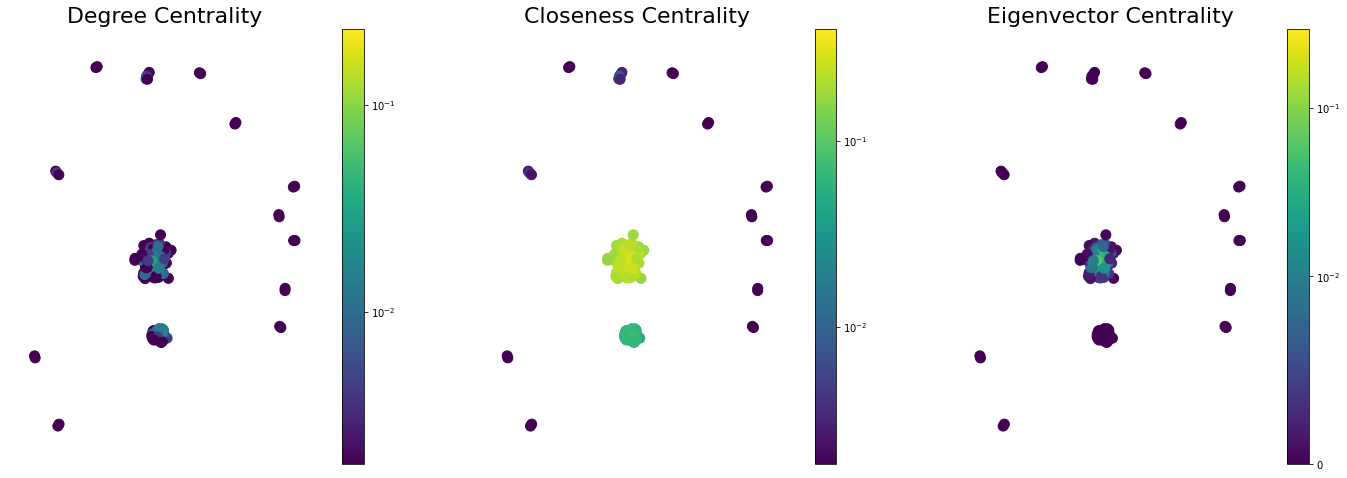

In [49]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter

pos =  nx.spring_layout(G)
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22)
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')


In [50]:
partition=community.best_partition(G, weight='MsgCount')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Modularity:  0.39338530099611396
Total number of Communities= 20


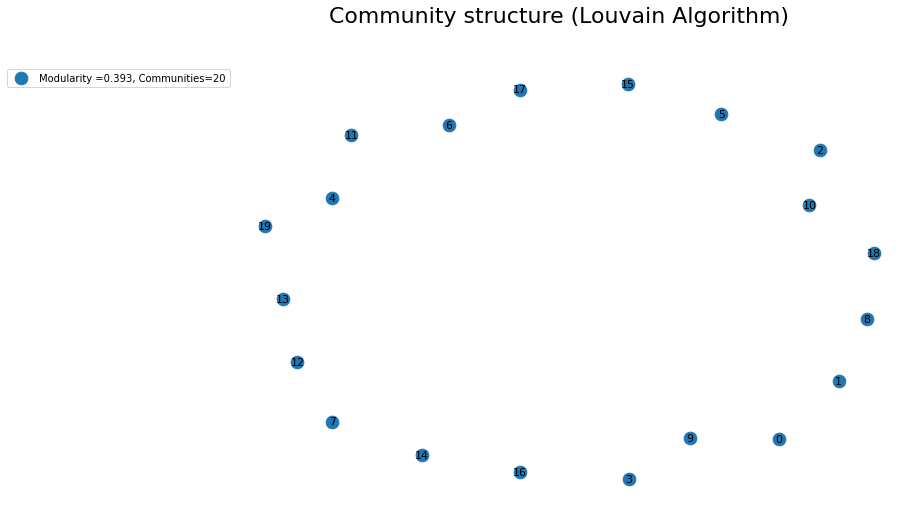

In [51]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

In [52]:
community_df


Members
Community_Num                                                   
0              salt | sugar | coconut_milk | rice_flour | glu...
5              central_java | jepara | bandung | west_java | ...
2              palm_sugar | onion | chili | beef | galangal |...
3              garlic | shallot | soy_sauce | lamb | chicken ...
4              water | ginger | lemongrass | meat | fish | mi...
13             rice | potato | jackfruit | grape | minced_mea...
7              scallion | peanut | cauliflower | cucumber | j...
8                                       hilsa | sweet_bean_paste
9              garam_masala | lentil | chickpea | chili_peppe...
10                                     makassar | south_sulawesi
11                                   prawn | starch | bread_roll
12             sweet_potato | papaya | rohu | star_anise | wa...
15                             lombok_timur | west_nusa_tenggara
16                                               mustard | sauce
17                                            atta | samgyeopsal
18                                                  curd | mochi
19                               curry | venerupis_philippinarum
1                                                  dashi | malai
6                                   cocos_nucifera | grape_juice
14                                                chhena | mirin

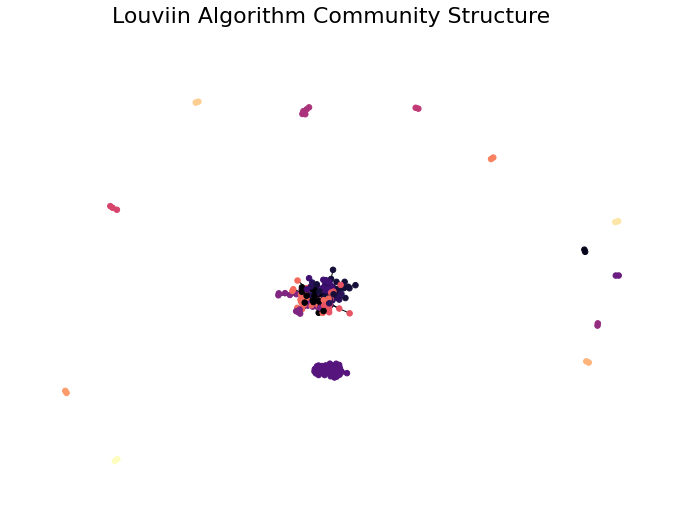

In [53]:
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=30, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.show()

In [54]:
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(G)

In [55]:
com=0
thisdict={}

# Populating the items of the dictionary
for c in next(comp):
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

values_girvan=[thisdict.get(node) for node in G.nodes()]
values_girvan


[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 4,
 4,
 0,
 0,
 5,
 5,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 7,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 0,
 0,
 0,
 0,
 5,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Total number of Communities= 15
Modularity: 0.20819193497214894


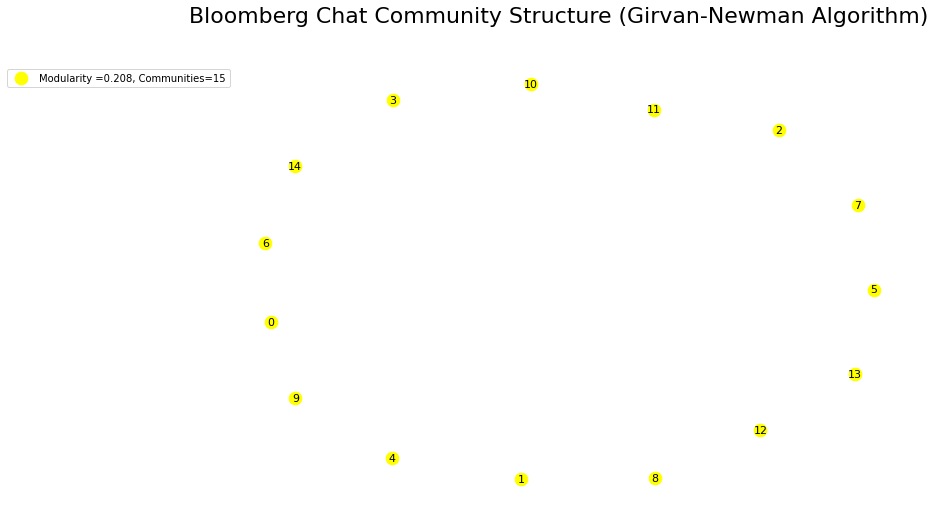

In [56]:
dict_nodes_girvan={}
for each_item in thisdict.items():
    community_num=each_item[1]
    community_node=each_item[0]
    
    if community_num in dict_nodes_girvan:
        value=dict_nodes_girvan.get(community_num) + ' | ' + str(community_node)
        dict_nodes_girvan.update({community_num: value})
    else:
        dict_nodes_girvan.update({community_num: community_node})
        
# Creating the output file
community_df_girvan=pd.DataFrame.from_dict(dict_nodes_girvan, orient='index',columns=['Members'])
community_df_girvan.index.rename('Community Num', inplace=True)
community_df_girvan.to_csv('Community_List_girvan_snippet.csv')

# Creating a graph where each node represents a community
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_nodes_girvan)

# Calculation of number of communities and modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
mod_girv=community.modularity(thisdict,G)
print("Modularity:", mod_girv)

# Creation of the graph
pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=160,font_size=11, node_color='yellow',
                 label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))
plt.suptitle('Bloomberg Chat Community Structure (Girvan-Newman Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.show()

In [57]:
G.neighbors('salt')

In [58]:
for node in G.neighbors('salt'): 
    print(f"Node: {node}")

Node: sugar
Node: coconut_milk
Node: garlic
Node: water
Node: egg
Node: chili
Node: rice_flour
Node: glutinous_rice_flour
Node: glutinous_rice
Node: soy_sauce
Node: rice
Node: palm_oil
Node: palm_sugar
Node: shallot
Node: coconut
Node: flour
Node: oil
Node: lime
Node: pandan
Node: blackpepper
Node: food_coloring
Node: lemongrass
Node: butter
Node: vinegar
Node: drinking_water
Node: tomato
Node: tapioca
Node: banana
Node: beef
Node: wheat_flour
Node: hot_sauce
Node: galangal
Node: flavour_enhancer
Node: fish
Node: potato
Node: peanut
Node: plantain
Node: pork_meat
Node: shrimp
Node: sodium_bicarbonate
Node: sweet_potato
Node: tapioca_flour
Node: tempeh
Node: vanilla
Node: vegetable
Node: walnut
Node: mango
Node: margarine
Node: meat
Node: milk
Node: lamb
Node: offal
Node: mineral_water
Node: msg
Node: noodle
Node: beet
Node: carrot
Node: cardamom
Node: agar
Node: corn
Node: cucumber
Node: cooking_oil


# number of connected nodes

In [59]:
nx.number_connected_components(G)

14

In [60]:
nx.connected_components(G)

<generator object connected_components at 0x7fbb51a91550>

In [61]:
nx.write_gml(G, "food.gml")

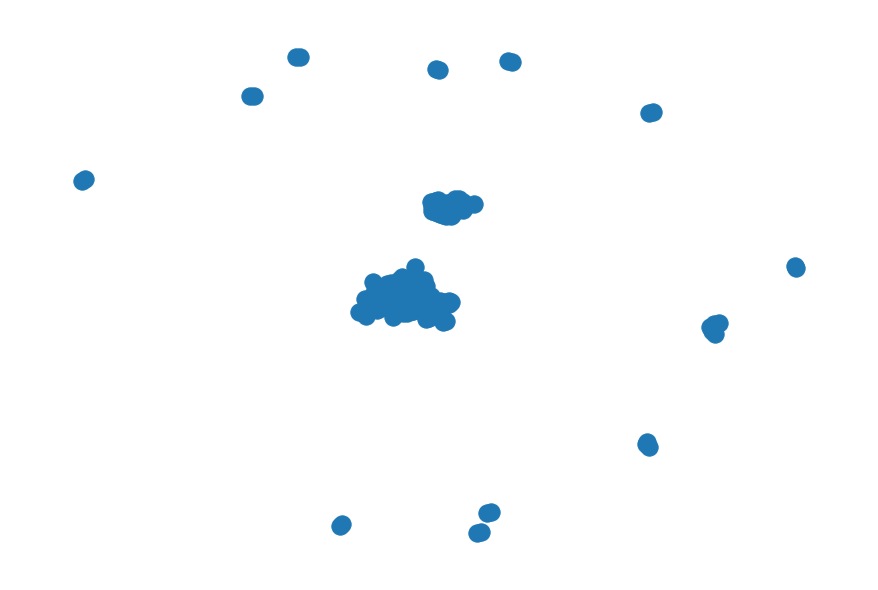

In [62]:
labels = {
    n: (G.nodes[n]['label']
        if len([nx.all_neighbors(G, n)]) > 30
        else '')
    for n in G.nodes
}
nx.draw(G, with_labels=True, labels=labels)

In [63]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

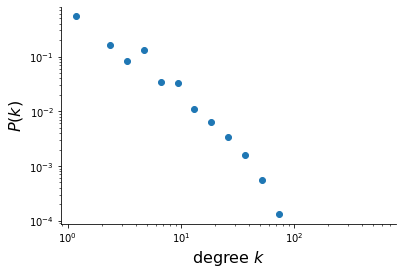

In [64]:
plot_degree_dist(G)

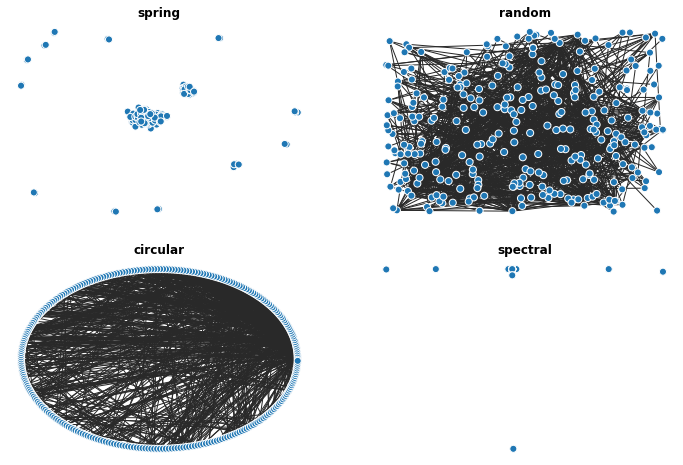

In [68]:
from grave import grave

fig, axes = plt.subplots(nrows=2, ncols=2)

grave.plot_network(G, ax=axes[0, 0], layout="spring")
axes[0, 0].set_title("spring", fontweight="bold")

grave.plot_network(G, ax=axes[1, 0], layout="circular")
axes[1, 0].set_title("circular", fontweight="bold")

grave.plot_network(G, ax=axes[0, 1], layout="random")
axes[0, 1].set_title("random", fontweight="bold")

grave.plot_network(G, ax=axes[1, 1], layout="spectral")
axes[1, 1].set_title("spectral", fontweight="bold")

plt.show()

In [69]:
# Compute the degree centralities of G:
degree_cent = nx.degree_centrality(G)
# Compute the maximum degree centrality: 
max_degree_cent = max(degree_cent.values())
# Find the item(s) that have highest co-occurrence
highest_cooccurrence = [n for n, dc in degree_cent.items() if dc == max_degree_cent]

print(highest_cooccurrence)

['coconut_milk']


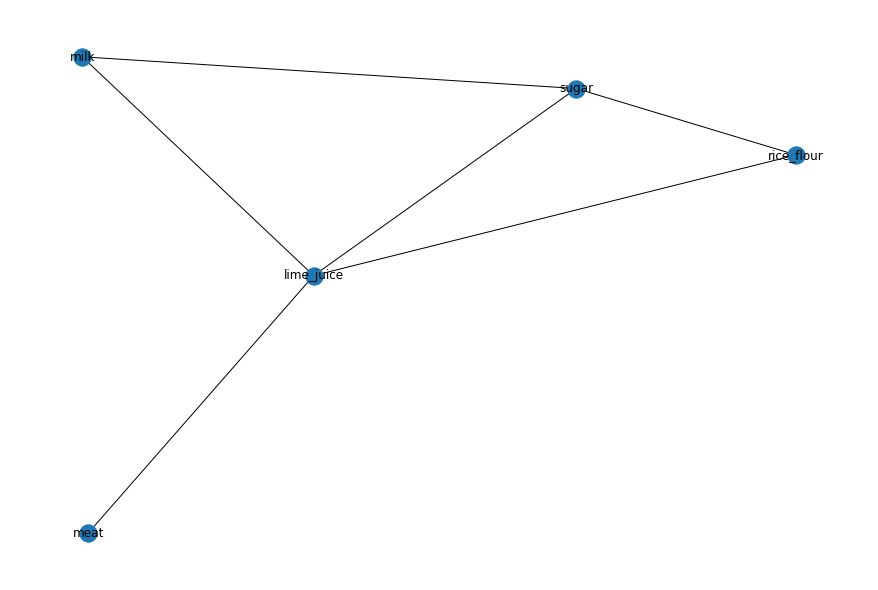

In [71]:
def get_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        for nbr in G.neighbors(n):
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest:
T_draw = get_nbrs(G, ['lime_juice'])

# Draw the subgraph
nx.draw(T_draw, with_labels=True)
plt.show()